# Package teomim use
---

To generate more digital twins using supplied model  at zenodo

1. https://zenodo.org/records/10598052/files/chicago_AA.pkl.gz?download=1   
    - For Africak American digital twins from Chicago
2. https://zenodo.org/records/10598052/files/national.pkl.gz?download=1
    - For national cohort with representative race not explicitly mentioned
    

In [1]:
from teomim import teomim

In [2]:
import requests
import gzip
import shutil
import os

# Define the URL and the filenames
url = "https://zenodo.org/records/10598052/files/chicago_AA.pkl.gz?download=1"
compressed_filename = "chicago_AA.pkl.gz"
decompressed_filename = "chicago_AA.pkl"

# Function to download the file
def download_file(url, local_filename):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(local_filename, 'wb') as file:
            for chunk in response.iter_content(chunk_size=1024):
                file.write(chunk)
        print(f"Downloaded {local_filename}")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

# Function to decompress the file
def decompress_file(compressed_filename, decompressed_filename):
    with gzip.open(compressed_filename, 'rb') as f_in:
        with open(decompressed_filename, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    print(f"Decompressed {decompressed_filename}")

# Download the compressed file
download_file(url, compressed_filename)

# Decompress the file
decompress_file(compressed_filename, decompressed_filename)


Downloaded chicago_AA.pkl.gz
Decompressed chicago_AA.pkl


In [4]:
# ALPHA is a frequcy modifier 
# For example {1.5:1} tunes up teh frequecy of EHR codes in history
# by tuning the probability of generation from internal model states by a log odds of 1.5
# Not necessary to modify, as model is already tuned optimally for examples

# num_patients: number of digital twins to generate
# model_path: path to the quasinet model downloaded and unpacked
# outfile: path to file generated
ALPHA={1:1}
P=teomim(modelpath='chicago_AA.pkl',alpha=ALPHA,
                 gz=False,outfile='out100.csv',num_patients=50)

In [5]:
%%time
P.generate()

100%|██████████| 50/50 [01:42<00:00,  2.05s/it]


CPU times: user 11.7 s, sys: 1.88 s, total: 13.6 s
Wall time: 1min 55s


In [10]:
# compare prevalences of various ICD code prefixes in generated data
# and what is expected in ADRD patients from literature
ef=P.evaluate()
print(ef)

     prevalences prevalence_expected
I10         0.22                 0.7
I25         0.52                 0.4
I50         0.46                0.25
E11         0.82                0.46
E66         0.32                 0.3
I63         0.40                 0.4
G20         0.02                0.15
F32         0.20                 0.5
F41         0.16                 0.4
M81         0.04                0.25
J44         0.12                0.55
J84         0.02               0.005


In [11]:
# This is comparison of the two prevelence columns 
# by computing the Bhattacharyya Coefficient
# 
print(P.quality())

92.28


<Axes: >

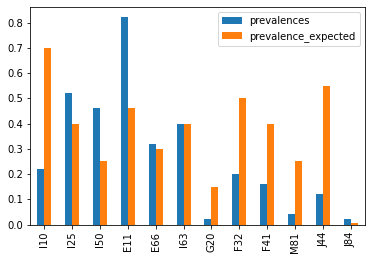

In [12]:
ef.plot(kind='bar')